In [2]:
!pip install folium

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

  Using cached folium-0.20.0-py2.py3-none-any.whl.metadata (4.2 kB)
  Using cached branca-0.8.1-py3-none-any.whl.metadata (1.5 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached xyzservices-2025.4.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached MarkupSafe-3.0.2-cp313-cp313-win_amd64.whl.metadata (4.1 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
Using cached folium-0.20.0-py2.py3-none-any.whl (113 kB)
Using cached branca-0.8.1-py3-none-any.whl (26 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached MarkupSafe-3.0.2-cp313-cp313-win_amd64.whl (15 kB)
Using cached requests-2.32.4-py3-none-any.whl (64 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
Using cached xyzservices-2025.4.0-py3-none-any.whl (90 kB)

   ---- -----------------------

In [23]:
import requests
import pandas as pd
from io import StringIO

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = requests.get(URL)
df = pd.read_csv(StringIO(resp.text))
print('Data downloaded and read into a dataframe!')


Data downloaded and read into a dataframe!


# TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year. (1 point)


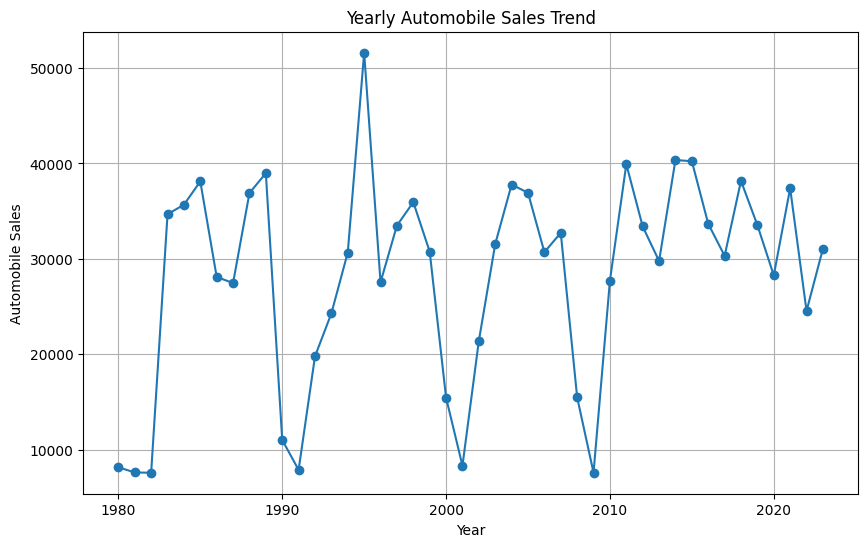

In [ ]:
sales_by_year = df.groupby("Year")["Automobile_Sales"].sum()

sales_by_year.plot(kind="line", figsize=(10,6), marker="o")

plt.title("Yearly Automobile Sales Trend")
plt.xlabel("Year")
plt.ylabel("Automobile Sales")
plt.grid(True)
plt.show()

# TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question "Is there a noticeable difference in sales trends between different vehicle types during recession periods?" (1 point)

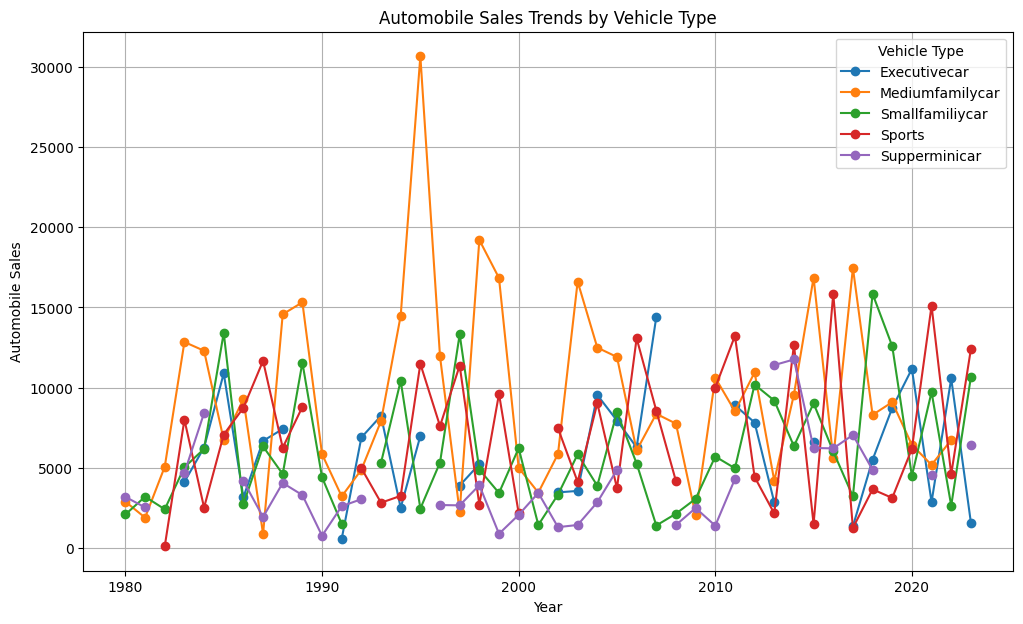

In [6]:
sales_by_type = df.groupby(["Year", "Vehicle_Type"])["Automobile_Sales"].sum().reset_index()

pivot_sales = sales_by_type.pivot(index="Year", columns="Vehicle_Type", values="Automobile_Sales")

pivot_sales.plot(kind="line", figsize=(12,7), marker="o")

plt.title("Automobile Sales Trends by Vehicle Type")
plt.xlabel("Year")
plt.ylabel("Automobile Sales")
plt.legend(title="Vehicle Type")
plt.grid(True)
plt.show()

# TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period. (1 point)

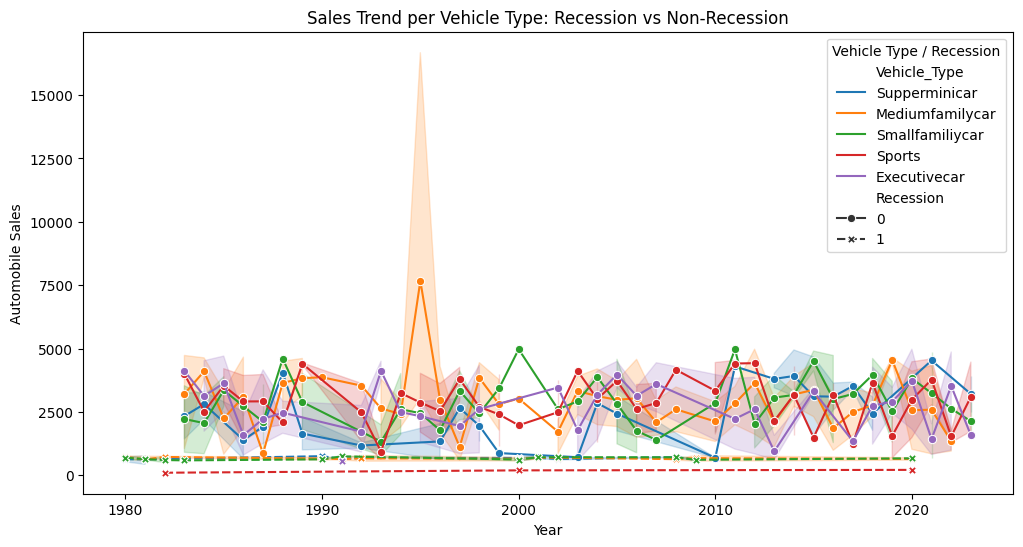

In [7]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df,
    x="Year",
    y="Automobile_Sales",
    hue="Vehicle_Type",
    style="Recession",  # differentiate recession vs non-recession
    markers=True,
    dashes=True
)

plt.title("Sales Trend per Vehicle Type: Recession vs Non-Recession")
plt.xlabel("Year")
plt.ylabel("Automobile Sales")
plt.legend(title="Vehicle Type / Recession")
plt.show()


# TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period. (2 points)


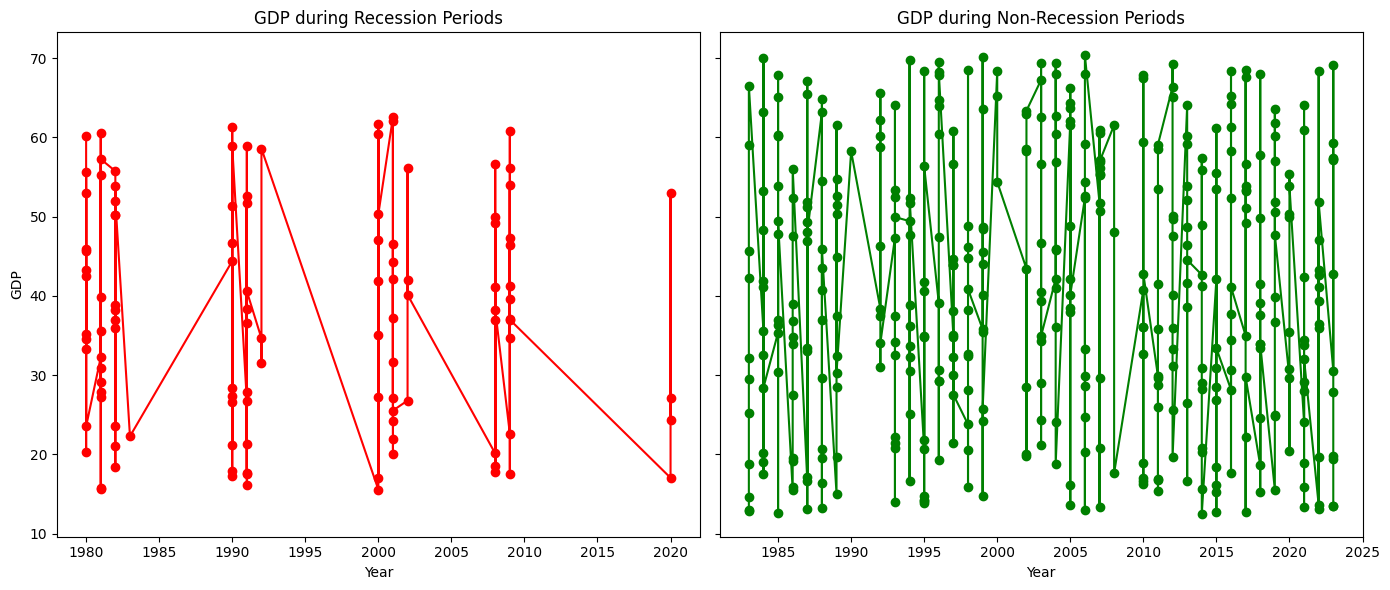

In [8]:
recession_data = df[df['Recession'] == 1]
non_recession_data = df[df['Recession'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].plot(recession_data['Year'], recession_data['GDP'], marker='o', color='red')
axes[0].set_title("GDP during Recession Periods")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("GDP")

axes[1].plot(non_recession_data['Year'], non_recession_data['GDP'], marker='o', color='green')
axes[1].set_title("GDP during Non-Recession Periods")
axes[1].set_xlabel("Year")

plt.tight_layout()
plt.show()

# TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales. (1 point)

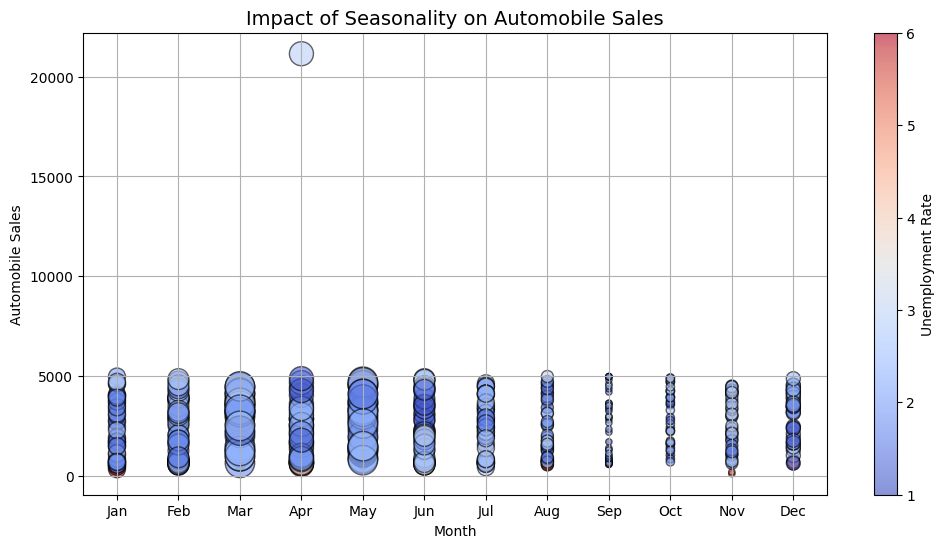

In [25]:


plt.figure(figsize=(12,6))
plt.scatter(
    df['Month'], 
    df['Automobile_Sales'], 
    s=df['Seasonality_Weight']*300,   
    c=df['unemployment_rate'],        
    cmap='coolwarm', 
    alpha=0.6, 
    edgecolors='k'
)

plt.title("Impact of Seasonality on Automobile Sales", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Automobile Sales")
plt.colorbar(label="Unemployment Rate")
plt.grid(True)
plt.show()

# TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions. (1 point)



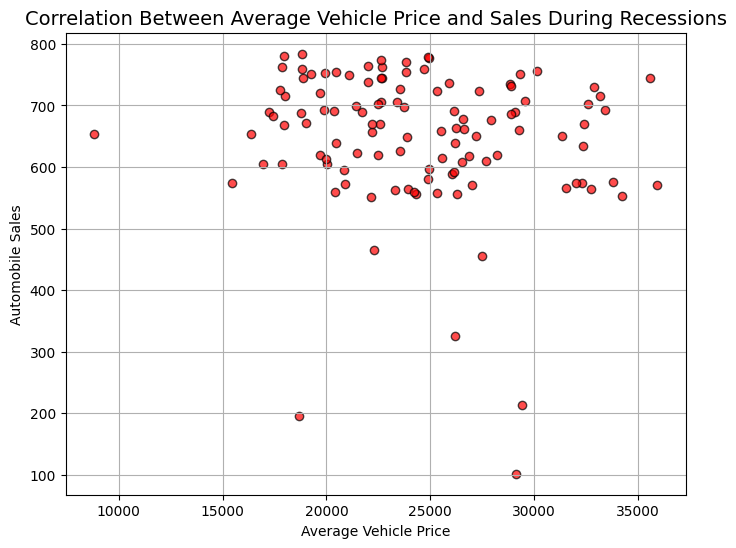

In [26]:
df.columns = df.columns.str.strip()


recession_data = df[df['Recession'] == 1]


plt.figure(figsize=(8,6))
plt.scatter(
    recession_data['Price'],
    recession_data['Automobile_Sales'],
    color='red',
    alpha=0.7,
    edgecolors='k'
)

plt.title("Correlation Between Average Vehicle Price and Sales During Recessions", fontsize=14)
plt.xlabel("Average Vehicle Price")
plt.ylabel("Automobile Sales")
plt.grid(True)
plt.show()

# TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods. (1 point)



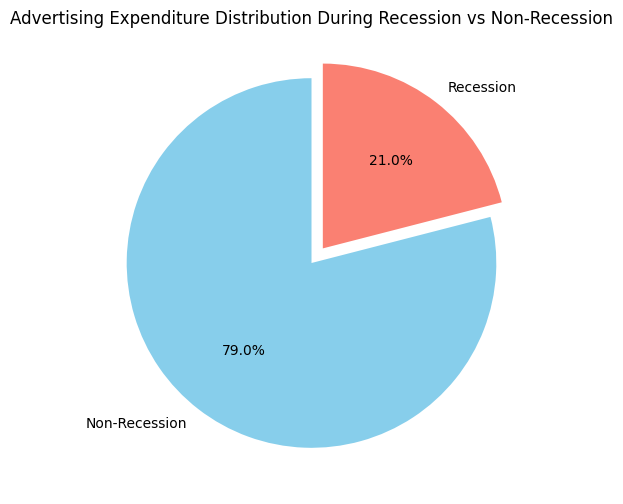

In [27]:
df.columns = df.columns.str.strip()

ad_exp_summary = df.groupby('Recession')['Advertising_Expenditure'].sum()

plt.figure(figsize=(6,6))
plt.pie(
    ad_exp_summary,
    labels=['Non-Recession', 'Recession'],  # Adjust labels based on your dataset
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon'],
    explode=(0, 0.1)  # slightly "explode" the recession slice for emphasis
)
plt.title("Advertising Expenditure Distribution During Recession vs Non-Recession")
plt.show()

# TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period. (1 point)

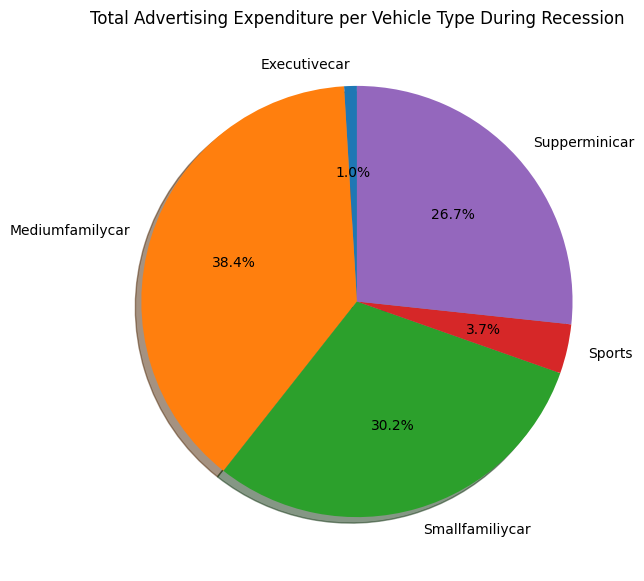

In [28]:
df.columns = df.columns.str.strip()

recession_data = df[df['Recession'] == 1]

ad_by_vehicle = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(7,7))
plt.pie(
    ad_by_vehicle,
    labels=ad_by_vehicle.index,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
plt.title("Total Advertising Expenditure per Vehicle Type During Recession")
plt.show()

# TASK 1.9:  Develop a line plot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period. (1 point)

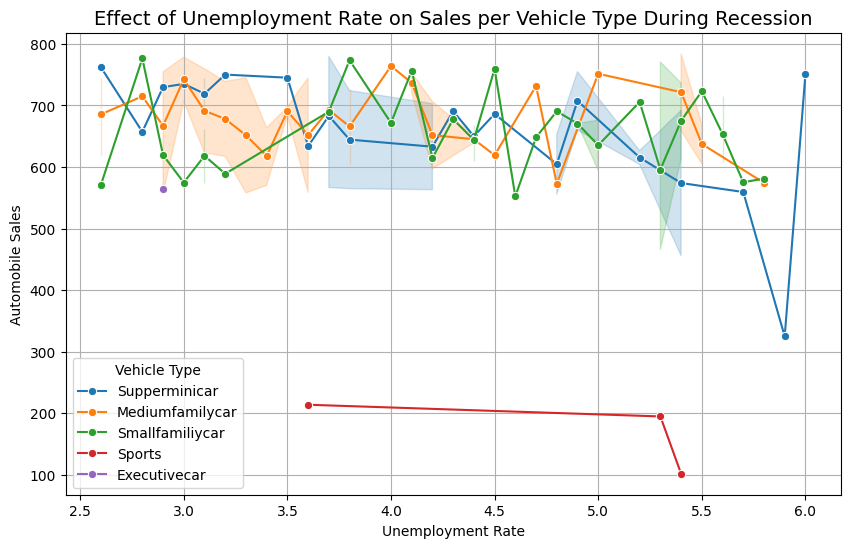

In [ ]:
df.columns = df.columns.str.strip()

recession_data = df[df['Recession'] == 1]

plt.figure(figsize=(10,6))
sns.lineplot(
    data=recession_data, 
    x='unemployment_rate', 
    y='Automobile_Sales', 
    hue='Vehicle_Type',
    marker='o'
)

plt.title("Effect of Unemployment Rate on Sales per Vehicle Type During Recession", fontsize=14)
plt.xlabel("Unemployment Rate")
plt.ylabel("Automobile Sales")
plt.grid(True)
plt.legend(title='Vehicle Type')
plt.show()

# TASK 2.1: Create a Dash application and give it a meaningful title. (2 points)

In [46]:
%pip install dash

from dash import Dash, html

# Initialize the Dash app
app = Dash(__name__)
app.title = "Automobile Sales Statistics Dashboard"

# Define the layout
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard", style={'textAlign': 'center', 'color': 'darkblue'})
])

# Run the app
# Run the app
if __name__ == '__main__':
    app.run(debug=True)


Note: you may need to restart the kernel to use updated packages.


# TASK 2.2: Add drop-downs to your dashboard with appropriate titles and options. (1 point)

In [47]:
from dash import Dash, html, dcc

# Initialize the Dash app
app = Dash(__name__)
app.title = "Automobile Sales Statistics Dashboard"

# Get unique vehicle types and years for dropdown options
vehicle_types = df['Vehicle_Type'].unique()
years = df['Year'].unique()

# Define layout with dropdowns
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard", style={'textAlign': 'center', 'color': 'darkblue'}),
    
    html.Div([
        html.Label("Select Vehicle Type:"),
        dcc.Dropdown(
            id='vehicle-dropdown',
            options=[{'label': vt, 'value': vt} for vt in vehicle_types],
            value=vehicle_types[0],   # default value
            clearable=False
        )
    ], style={'width': '45%', 'display': 'inline-block', 'margin-right': '5%'}),
    
    html.Div([
        html.Label("Select Year:"),
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': y, 'value': y} for y in years],
            value=years[0],           # default value
            clearable=False
        )
    ], style={'width': '45%', 'display': 'inline-block'})
])

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


# TASK 2.3: Add a division for output display with appropriate 'id' and 'classname' property. (1 point)

In [48]:
from dash import Dash, html, dcc

# Initialize the Dash app
app = Dash(__name__)
app.title = "Automobile Sales Statistics Dashboard"

vehicle_types = df['Vehicle_Type'].unique()
years = df['Year'].unique()

# Define layout with dropdowns and output division
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard", style={'textAlign': 'center', 'color': 'darkblue'}),
    
    html.Div([
        html.Label("Select Vehicle Type:"),
        dcc.Dropdown(
            id='vehicle-dropdown',
            options=[{'label': vt, 'value': vt} for vt in vehicle_types],
            value=vehicle_types[0],
            clearable=False
        )
    ], style={'width': '45%', 'display': 'inline-block', 'margin-right': '5%'}),
    
    html.Div([
        html.Label("Select Year:"),
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': y, 'value': y} for y in years],
            value=years[0],
            clearable=False
        )
    ], style={'width': '45%', 'display': 'inline-block'}),
    
    # Output display division
    html.Div(
        id='output-container',      # ID used for callbacks
        className='output-div',     # Class for styling
        style={'margin-top': '50px'}
    )
])

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


# TASK 2.4: Creating Callbacks; Define the callback function to update the input container. (5 points)


In [49]:
from dash import Dash, html, dcc, Input, Output
import plotly.express as px

# Initialize the Dash app
app = Dash(__name__)
app.title = "Automobile Sales Statistics Dashboard"

vehicle_types = df['Vehicle_Type'].unique()
years = df['Year'].unique()

# Layout with dropdowns and output container
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard", style={'textAlign': 'center', 'color': 'darkblue'}),
    
    html.Div([
        html.Label("Select Vehicle Type:"),
        dcc.Dropdown(
            id='vehicle-dropdown',
            options=[{'label': vt, 'value': vt} for vt in vehicle_types],
            value=vehicle_types[0],
            clearable=False
        )
    ], style={'width': '45%', 'display': 'inline-block', 'margin-right': '5%'}),
    
    html.Div([
        html.Label("Select Year:"),
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': y, 'value': y} for y in years],
            value=years[0],
            clearable=False
        )
    ], style={'width': '45%', 'display': 'inline-block'}),
    
    html.Div(
        id='output-container',
        className='output-div',
        style={'margin-top': '50px'}
    )
])

# Callback to update graph based on dropdown selections
@app.callback(
    Output('output-container', 'children'),
    Input('vehicle-dropdown', 'value'),
    Input('year-dropdown', 'value')
)
def update_graph(selected_vehicle, selected_year):
    filtered_df = df[(df['Vehicle_Type'] == selected_vehicle) & (df['Year'] == selected_year)]
    
    fig = px.line(
        filtered_df, 
        x='Month', 
        y='Automobile_Sales',
        title=f'Automobile Sales for {selected_vehicle} in {selected_year}'
    )
    
    return dcc.Graph(figure=fig)

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


# TASK 2.5: Create and display graphs for Recession Report Statistics. (3 points)


In [50]:
from dash import Dash, html, dcc, Input, Output
import plotly.express as px

# Initialize Dash app
app = Dash(__name__)
app.title = "Automobile Sales Statistics Dashboard"

# Layout
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard", style={'textAlign': 'center', 'color': 'darkblue'}),
    
    html.Div([
        html.Label("Select Vehicle Type:"),
        dcc.Dropdown(
            id='vehicle-dropdown',
            options=[{'label': vt, 'value': vt} for vt in df['Vehicle_Type'].unique()],
            value=df['Vehicle_Type'].unique()[0],
            clearable=False
        )
    ], style={'width': '45%', 'display': 'inline-block', 'margin-right': '5%'}),
    
    html.Div([
        html.Label("Select Year:"),
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': y, 'value': y} for y in df['Year'].unique()],
            value=df['Year'].unique()[0],
            clearable=False
        )
    ], style={'width': '45%', 'display': 'inline-block'}),
    
    html.Div(
        id='recession-graphs',
        className='output-div',
        style={'margin-top': '50px'}
    )
])

# Callback for Recession Report Statistics
@app.callback(
    Output('recession-graphs', 'children'),
    Input('vehicle-dropdown', 'value')
)
def update_recession_graphs(selected_vehicle):
    # Filter data for recession
    recession_df = df[(df['Vehicle_Type'] == selected_vehicle) & (df['Recession'] == 1)]
    
    # Graph 1: Automobile Sales
    fig_sales = px.line(
        recession_df, x='Month', y='Automobile_Sales',
        title=f'Automobile Sales for {selected_vehicle} during Recession'
    )
    
    # Graph 2: Average Price
    fig_price = px.line(
        recession_df, x='Month', y='Price',
        title=f'Average Vehicle Price for {selected_vehicle} during Recession'
    )
    
    # Graph 3: Advertising Expenditure
    fig_ad = px.bar(
        recession_df, x='Month', y='Advertising_Expenditure',
        title=f'Advertising Expenditure for {selected_vehicle} during Recession'
    )
    
    return [
        dcc.Graph(figure=fig_sales),
        dcc.Graph(figure=fig_price),
        dcc.Graph(figure=fig_ad)
    ]

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


# TASK 2.6: Create and display graphs for Yearly Report Statistics. (2 points)


In [51]:
# Import required libraries
from dash import Dash, dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# Load dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)

# Create Dash app
app = Dash(__name__)
app.title = "Automobile Sales Statistics Dashboard"

# Dropdown options
vehicle_types = df['Vehicle_Type'].unique()
years = df['Year'].unique()

# Define layout
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard", style={'textAlign': 'center', 'color': 'darkblue'}),
    
    html.Div([
        html.Label("Select Vehicle Type:"),
        dcc.Dropdown(
            id='vehicle-dropdown',
            options=[{'label': vt, 'value': vt} for vt in vehicle_types],
            value=vehicle_types[0],
            clearable=False
        )
    ], style={'width': '45%', 'display': 'inline-block', 'margin-right': '5%'}),
    
    html.Div([
        html.Label("Select Year:"),
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': y, 'value': y} for y in years],
            value=years[0],
            clearable=False
        )
    ], style={'width': '45%', 'display': 'inline-block'}),
    
    html.H2("Recession Report Statistics", style={'margin-top': '50px'}),
    html.Div(id='recession-graphs', className='output-div'),
    
    html.H2("Yearly Report Statistics", style={'margin-top': '50px'}),
    html.Div(id='yearly-graphs', className='output-div')
])

# Callback for Recession Report
@app.callback(
    Output('recession-graphs', 'children'),
    Input('vehicle-dropdown', 'value')
)
def update_recession_graphs(selected_vehicle):
    recession_df = df[(df['Vehicle_Type'] == selected_vehicle) & (df['Recession'] == 1)]
    
    if recession_df.empty:
        return html.P("No data for recession period for selected vehicle.", style={'color': 'red'})
    
    # Scatter plot: Price vs Sales
    fig_scatter = px.scatter(
        recession_df, x='Price', y='Automobile_Sales',
        title=f'Price vs Sales during Recession ({selected_vehicle})',
        size='Advertising_Expenditure', color='GDP', hover_data=['Month', 'Year']
    )
    
    # Pie chart: Advertising Expenditure
    adv_df = recession_df.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
    fig_pie = px.pie(
        adv_df, names='Vehicle_Type', values='Advertising_Expenditure',
        title=f'Advertising Expenditure by Vehicle Type during Recession'
    )
    
    return [
        dcc.Graph(figure=fig_scatter),
        dcc.Graph(figure=fig_pie)
    ]

# Callback for Yearly Report
@app.callback(
    Output('yearly-graphs', 'children'),
    Input('vehicle-dropdown', 'value')
)
def update_yearly_graphs(selected_vehicle):
    yearly_df = df[df['Vehicle_Type'] == selected_vehicle].groupby('Year').agg({
        'Automobile_Sales': 'sum',
        'Price': 'mean',
        'Advertising_Expenditure': 'sum'
    }).reset_index()
    
    # Total Sales per Year
    fig_sales = px.bar(
        yearly_df, x='Year', y='Automobile_Sales',
        title=f'Total Automobile Sales per Year ({selected_vehicle})'
    )
    
    # Average Price per Year
    fig_price = px.line(
        yearly_df, x='Year', y='Price',
        title=f'Average Vehicle Price per Year ({selected_vehicle})'
    )
    
    # Advertising Expenditure per Year
    fig_adv = px.bar(
        yearly_df, x='Year', y='Advertising_Expenditure',
        title=f'Advertising Expenditure per Year ({selected_vehicle})'
    )
    
    return [
        dcc.Graph(figure=fig_sales),
        dcc.Graph(figure=fig_price),
        dcc.Graph(figure=fig_adv)
    ]

# Run app
if __name__ == '__main__':
    app.run(debug=True)
